In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#Importing Dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your Excel file
file_path = '/content/drive/MyDrive/Case Study/Banking Case - Data.xlsx'

# Load the 'Transaction Data' sheet
data1 = pd.read_excel(file_path, sheet_name='Customer Demographics')
data2 = pd.read_excel(file_path, sheet_name='Transaction Data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Merging the datasets against **Customer_number**

In [ ]:
merged_data = pd.merge(data1, data2, on='Customer_number', how='inner')
merged_data.head()

,Customer_number,age,job,marital,education,Annual Income,Gender,Sno,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,1001,58,management,married,tertiary,839368,M,0,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0
1,1002,44,technician,single,secondary,1452858,M,1,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0
2,1003,33,entrepreneur,married,NaN,4851383,F,2,no,2,yes,yes,unknown,76.0,1,2,0,NaN,no,422.0
3,1004,47,blue collar,married,unknown,3207754,F,3,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0
4,1005,33,unknown,single,unknown,2562322,M,4,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0


In [ ]:
merged_data.isnull().sum()

,0
Customer_number,0
age,0
job,13
marital,18
education,21
Annual Income,17
Gender,0
Sno,0
Insurance,0
balance,55


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_number   45211 non-null  int64  
 1   age               45211 non-null  int64  
 2   job               45198 non-null  object 
 3   marital           45193 non-null  object 
 4   education         45190 non-null  object 
 5   Annual Income     45194 non-null  object 
 6   Gender            45211 non-null  object 
 7   Sno               45211 non-null  int64  
 8   Insurance         45211 non-null  object 
 9   balance           45156 non-null  object 
 10  housing           45211 non-null  object 
 11  loan              45203 non-null  object 
 12  contact           45168 non-null  object 
 13  duration          45172 non-null  float64
 14  campaign          45211 non-null  int64  
 15  last_contact_day  45211 non-null  int64  
 16  previous          45211 non-null  int64 

#**Data Pre - Processing** for Data Analysis & Visualization:

---



#Contacts

In [ ]:
# Check for unique values
print(merged_data['contact'].unique())

[nan 'unknown' '?' 'cellular' 'telephone' 'Mobile' 'Tel']


In [ ]:
# Replace 'Tel' with 'Telephone' in the 'contact' column
merged_data['contact'] = merged_data['contact'].replace({'Tel': 'Telephone', 'telephone': 'Telephone'})
merged_data['contact'] = merged_data['contact'].replace({'?': 'unknown'})

# Replace special characters in the 'contact' column with NaN
merged_data['contact'] = merged_data['contact'].replace('[^a-zA-Z0-9 ]', np.nan, regex=True)

# Calculate the mode of the 'contact' column
contact_mode = merged_data['contact'].mode()[0]

# Replace missing values with the mode
merged_data['contact'].fillna(contact_mode, inplace=True)

In [ ]:
# Check for unique values
print(merged_data['contact'].unique())

['cellular' 'unknown' 'Telephone' 'Mobile']


#Annual Income

In [ ]:
# Replace null values with 0 in the "income" column in place
merged_data['Annual Income'].fillna(0, inplace=True)

# Identify and replace special characters with 0 in the "Annual Income" column
merged_data['Annual Income'] = merged_data['Annual Income'].replace('[^0-9]', '0', regex=True)

# Convert the "Annual Income" column to numeric values
merged_data['Annual Income'] = pd.to_numeric(merged_data['Annual Income'], errors='coerce')

#Balance

In [ ]:
# Convert the "balance" column to numeric values
merged_data['balance'] = pd.to_numeric(merged_data['balance'], errors='coerce')

# Calculate the mean of the 'balance' column
balance_mean = merged_data['balance'].mean()

# Identify and replace special characters with 0 in the "balance" column
merged_data['balance'] = merged_data['balance'].replace('[^0-9]', 'balance_mean', regex=True)

# Replace missing values with the mean
merged_data['balance'].fillna(balance_mean, inplace=True)

#Jobs

In [ ]:
# Check for unique values
print(merged_data['job'].unique())

# Replace 'blue collor' with 'blue-collar' and 'admin.' with 'admin' in the 'Jobs' column
merged_data['job'].replace({'blue collar': 'blue-collar','admin.':'admin'}, regex=True, inplace=True)

# Calculate the mode of the 'job' column
job_mode = merged_data['job'].mode()[0]

# Replace missing values with the mode
merged_data['job'].fillna(job_mode, inplace=True)

['management' 'technician' 'entrepreneur' 'blue collar' 'unknown'
 'retired' 'admin.' 'services' 'blue-collar' 'self-employed' 'unemployed'
 'housemaid' 'student' nan]


In [ ]:
print(merged_data['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


#Educations

In [ ]:
# Check for unique values
print(merged_data['education'].unique())

# Replace 'primary' with 'Primary' and 'ter tiary' with 'tertiary' in the 'education' column
merged_data['education'].replace({'Primary': 'primary','ter tiary':'tertiary'}, regex=True, inplace=True)

# Calculate the mode of the 'education' column
education_mode = merged_data['education'].mode()[0]

# Replace missing values with the mode
merged_data['education'].fillna(education_mode, inplace=True)

['tertiary' 'secondary' nan 'unknown' 'ter tiary' 'primary' 'Primary']


In [ ]:
print(merged_data['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary']


#Using Label Encoding

In [ ]:
label_encoder = LabelEncoder()
merged_data['Term Deposit'] = label_encoder.fit_transform(merged_data['Term Deposit'])
merged_data['housing'] = label_encoder.fit_transform(merged_data['housing'])
merged_data['loan'] = label_encoder.fit_transform(merged_data['loan'])

In [ ]:
merged_data.isnull().sum()

,0
Customer_number,0
age,0
job,0
marital,18
education,0
Annual Income,0
Gender,0
Sno,0
Insurance,0
balance,0


In [ ]:
merged_data.dropna(inplace=True)

#Data Analysis & Visualization:

---



#1. Income Insights

Number of customers with no annual income: 18
Number of customers with annual income : 45120



Text(0.5, 1.0, 'Proportion of Customers with and without Annual Income')

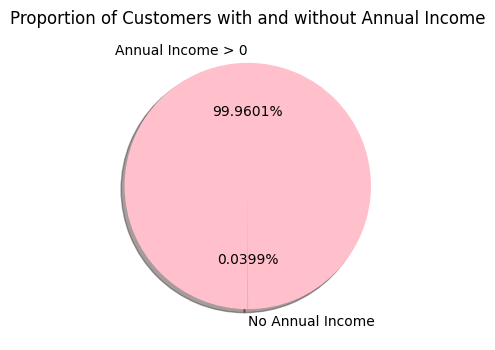

In [ ]:
import matplotlib.pyplot as plt

# Separate customers with annual income 0 and greater than 0
customers_no_income = merged_data[merged_data['Annual Income'] == 0]
customers_with_income = merged_data[merged_data['Annual Income'] > 0]

# Compare the two groups
num_customers_no_income = len(customers_no_income)
num_customers_with_income = len(customers_with_income)

print(f"Number of customers with no annual income: {num_customers_no_income}")
print(f"Number of customers with annual income : {num_customers_with_income}")

print()

# Visualize the comparison using a pie chart
labels = ['No Annual Income', 'Annual Income > 0']
sizes = [num_customers_no_income, num_customers_with_income]
colors = ['red', 'pink']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.4f%%',  shadow=True, startangle=270)
plt.title('Proportion of Customers with and without Annual Income')

#2. Loan - Less Customer Profile

Customers without loan:  17173
Customers with loan:  27965



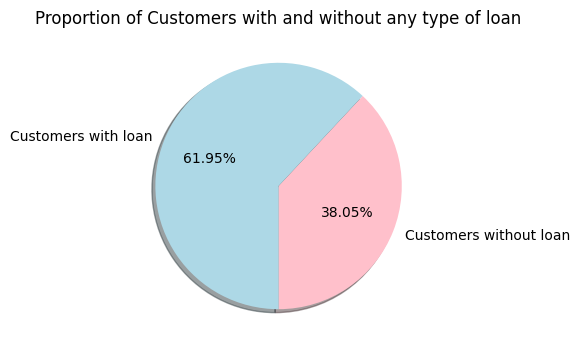

In [ ]:
# Filter out customers without any type of loan
customers_without_loan = merged_data[(merged_data['loan'] == 0) & (merged_data['housing'] == 0)]
print("Customers without loan: ",len(customers_without_loan))

customers_with_loan = merged_data[(merged_data['loan'] == 1) | (merged_data['housing'] == 1)]
print("Customers with loan: ",len(customers_with_loan))
print()

# Visualize the comparison using a pie chart
labels = ['Customers without loan', 'Customers with loan']
sizes = [len(customers_without_loan), len(customers_with_loan)]
colors = ['pink', 'lightblue']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=270)
plt.title('Proportion of Customers with and without any type of loan')
plt.show()

Text(0.5, 1.0, 'Distribution of Income for Customers with Loans')

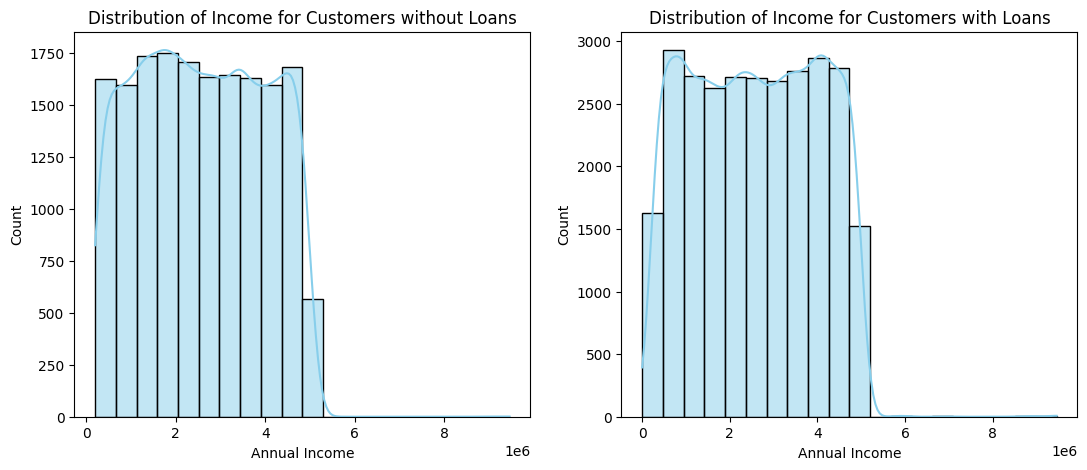

In [ ]:
import seaborn as sns

# Plot the distribution of Income for customers without and with loans
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.histplot(customers_without_loan['Annual Income'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Income for Customers without Loans')

plt.subplot(1, 3, 2)
sns.histplot(customers_with_loan['Annual Income'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Income for Customers with Loans')

Text(0.5, 1.0, 'Distribution of Balance for Customers with Loans')

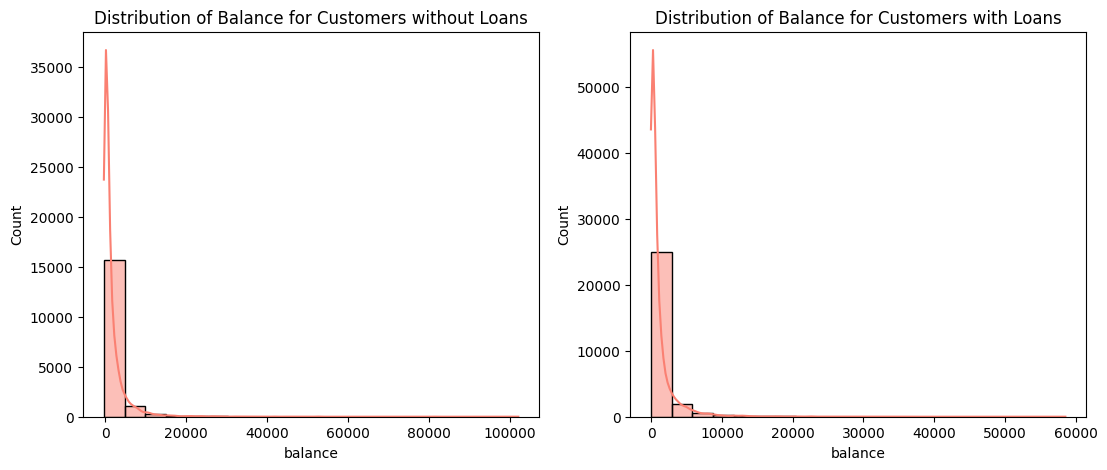

In [ ]:
# Plot the distribution of balance for customers without and with loans
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.histplot(customers_without_loan['balance'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Balance for Customers without Loans')

plt.subplot(1, 3, 2)
sns.histplot(customers_with_loan['balance'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Balance for Customers with Loans')

<ipython-input-40-2e785644b9a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job', data=customers_without_loan, palette='pastel')
<ipython-input-40-2e785644b9a4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job', data=customers_with_loan, palette='pastel')


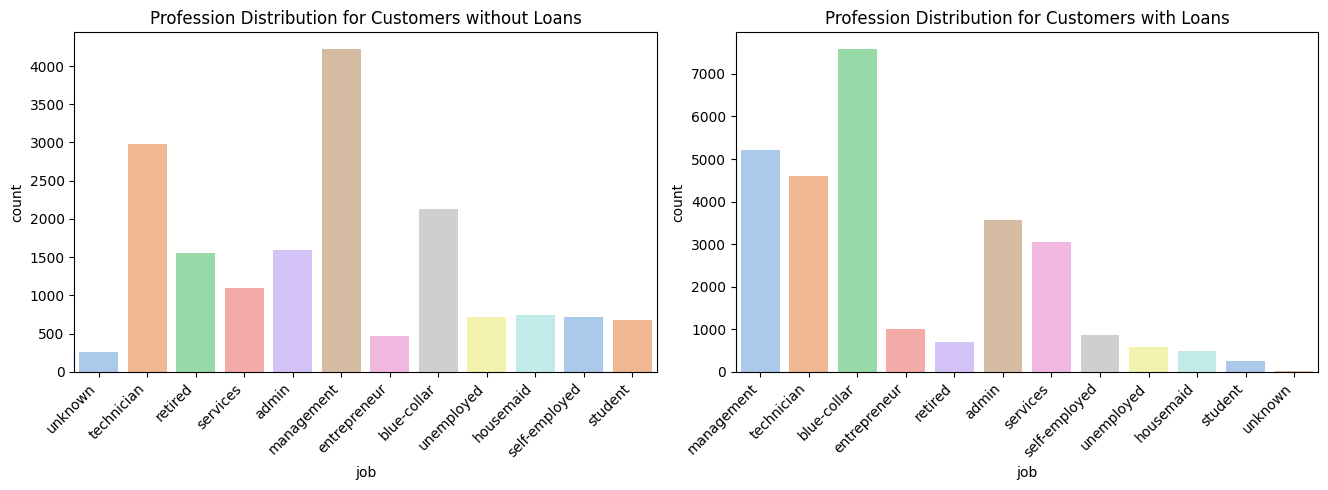

In [ ]:
# Plot the distribution of profession for customers without and with loans
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='job', data=customers_without_loan, palette='pastel')
plt.title('Profession Distribution for Customers without Loans')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.countplot(x='job', data=customers_with_loan, palette='pastel')
plt.title('Profession Distribution for Customers with Loans')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#3. Loan and Insurance Analysis

Percentage of customers with a loan who have taken out insurance: 2.15%



<ipython-input-41-4149fa49e0b4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Insurance', data=customers_with_loan, palette='pastel')


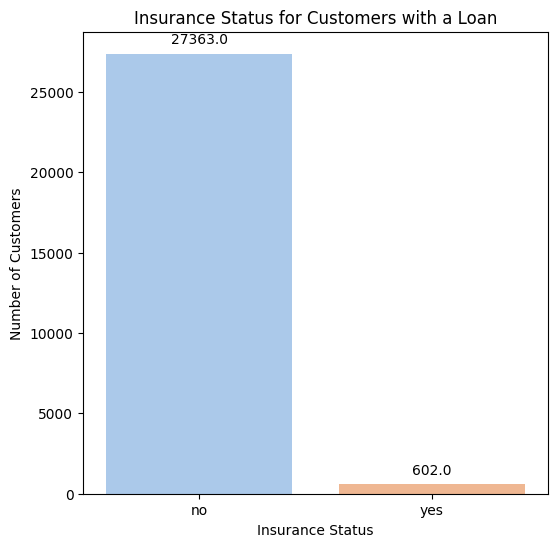

In [ ]:
# Percentage of customers with a loan who have taken out insurance
percentage_with_insurance = (customers_with_loan['Insurance'].eq('yes').sum() / len(customers_with_loan)) * 100

# Print the percentage
print(f"Percentage of customers with a loan who have taken out insurance: {percentage_with_insurance:.2f}%")
print()

# Visualize the data with data labels
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='Insurance', data=customers_with_loan, palette='pastel')

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Insurance Status for Customers with a Loan')
plt.xlabel('Insurance Status')
plt.ylabel('Number of Customers')
plt.show()

#4. Communication Strategy Insights

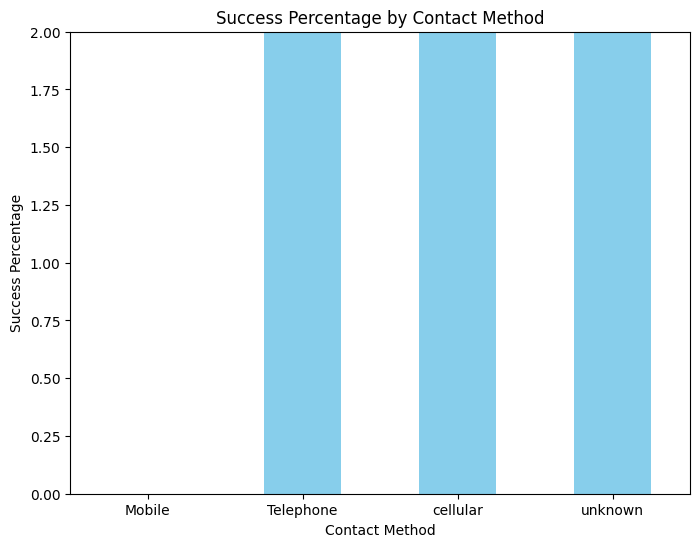


The best contact method with the highest success percentage is: cellular


In [ ]:
# Group data by contact method and calculate success percentage
contact_grouped = merged_data.groupby('contact')['Term Deposit'].mean() * 100


# Plot the success percentage for each contact method
plt.figure(figsize=(8, 6))
contact_grouped.plot(kind='bar', color='skyblue')
plt.title('Success Percentage by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Success Percentage')
plt.ylim(0, 2)
plt.xticks(rotation=0)
plt.show()

print()

# Identify the contact method with the highest success percentage
best_contact_method = contact_grouped.idxmax()
print(f"The best contact method with the highest success percentage is: {best_contact_method}")

#5. Age and Home Loans

In [ ]:
# Find the minimum and maximum age
min_age = merged_data['age'].min()
max_age = merged_data['age'].max()

print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")

Minimum age: 18
Maximum age: 121


<ipython-input-44-8adf0223be3f>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_percentages = merged_data.groupby('age_group')['housing'].mean() * 100


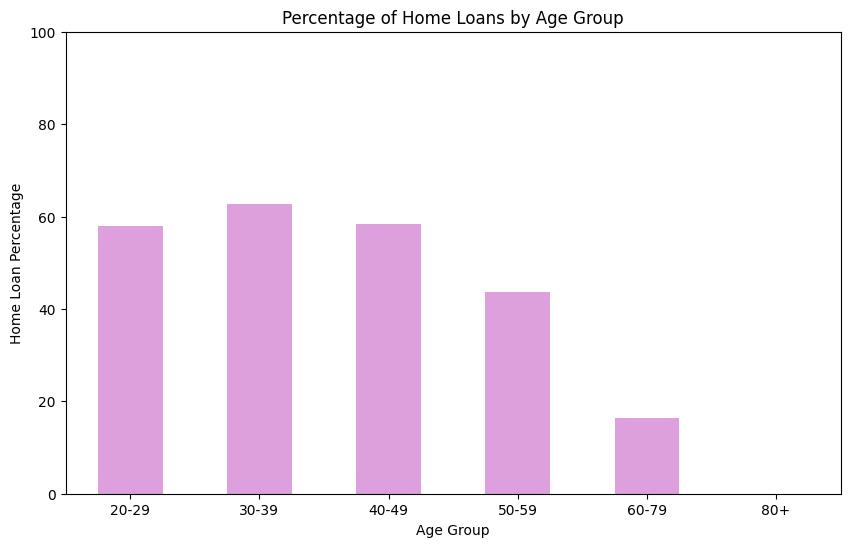


The age group with the highest percentage of home loans is: 30-39


In [ ]:
# Create age groups

bins = [20, 30, 40, 50, 60, 80, 120]
labels = ['20-29', '30-39', '40-49', '50-59', '60-79','80+']
merged_data['age_group'] = pd.cut(merged_data['age'], bins=bins, labels=labels, right=False)

# Calculate home loan percentage for each age group
age_group_percentages = merged_data.groupby('age_group')['housing'].mean() * 100

# Plot the home loan percentages for each age group
plt.figure(figsize=(10, 6))
age_group_percentages.plot(kind='bar', color='plum')
plt.title('Percentage of Home Loans by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Home Loan Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.show()

print()

# Identify the age group with the highest home loan percentage
max_home_loan_age_group = age_group_percentages.idxmax()
print(f"The age group with the highest percentage of home loans is: {max_home_loan_age_group}")

#6. Income and Age Relationship

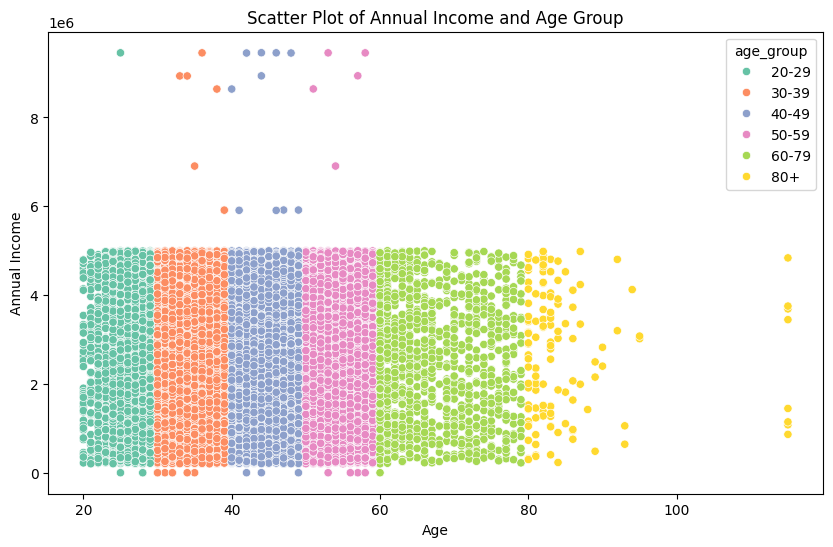


Correlation Coefficient: 0.0012422576946844945


In [ ]:
# Create age groups

bins = [20, 30, 40, 50, 60, 80, 120]
labels = ['20-29', '30-39', '40-49', '50-59', '60-79','80+']
merged_data['age_group'] = pd.cut(merged_data['age'], bins=bins, labels=labels, right=False)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='Annual Income', hue='age_group', data = merged_data, palette='Set2')
plt.title('Scatter Plot of Annual Income and Age Group')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

print()

# Calculate correlation coefficients
correlation_matrix = merged_data[['age', 'Annual Income']].corr()
correlation_coefficient = correlation_matrix.loc['age', 'Annual Income']
print(f"Correlation Coefficient: {correlation_coefficient}")

In [ ]:
# Remove multiple columns, for example, 'customer_number' and 'Sno'
merged_data = merged_data.drop(columns=['Customer_number', 'Sno'])



##**MODELLING**

---

##Data Pre-Processing

In [ ]:
final_data = pd.merge(data1, data2, on='Customer_number', how='inner')

In [ ]:
final_data.isnull().sum()

,0
Customer_number,0
age,0
job,13
marital,18
education,21
Annual Income,17
Gender,0
Sno,0
Insurance,0
balance,55


## Dropping unnecessary columns

In [ ]:
#Serial No
final_data.drop('Sno', axis=1, inplace=True)

#Customer_number
final_data.drop('Customer_number', axis=1, inplace=True)

## Dealing with Numerical data

In [ ]:
#Annual Income
final_data['Annual Income'].fillna(0, inplace=True)
final_data['Annual Income'] = final_data['Annual Income'].replace('[^0-9]', '0', regex=True)
final_data['Annual Income'] = pd.to_numeric(final_data['Annual Income'], errors='coerce')

# Balance
final_data['balance'] = pd.to_numeric(final_data['balance'], errors='coerce')
balance_mean = final_data['balance'].mean()
final_data['balance'].fillna(balance_mean, inplace=True)
final_data['balance'] = final_data['balance'].replace('[^0-9]', 'balance_mean', regex=True)

# Duration
duration_mean = final_data['duration'].mean()
final_data['duration'].fillna(duration_mean, inplace=True)

# Count_Txn
txn_mean = final_data['Count_Txn'].mean()
final_data['Count_Txn'].fillna(txn_mean, inplace=True)

# Dealing with Categorical Data

In [ ]:
print(final_data['contact'].value_counts())
print()
print("----------------------------")
print(final_data['job'].value_counts())
print()
print("----------------------------")
print(final_data['marital'].value_counts())
print()
print("----------------------------")
print(final_data['education'].value_counts())
print()
print("----------------------------")
print(final_data['poutcome'].value_counts())

contact
cellular     29282
unknown      12970
telephone     2850
Mobile          29
Tel             20
?               17
Name: count, dtype: int64

----------------------------
job
blue-collar      9623
management       9455
technician       7595
admin.           5171
services         4153
retired          2264
self-employed    1579
entrepreneur     1486
unemployed       1302
housemaid        1240
student           938
unknown           288
blue collar       104
Name: count, dtype: int64

----------------------------
marital
married     27202
single      12787
divorced     5204
Name: count, dtype: int64

----------------------------
education
secondary    23187
tertiary     13296
primary       6845
unknown       1857
Primary          3
ter tiary        2
Name: count, dtype: int64

----------------------------
poutcome
unknown    36884
failure     4901
other       1840
success     1511
pending       55
?              4
????           1
Name: count, dtype: int64


In [ ]:
#Contact
# Replace 'Tel' with 'Telephone' in the 'contact' column
final_data['contact'] =final_data['contact'].replace({'Tel': 'Telephone', 'telephone': 'Telephone'})
final_data['contact'] = final_data['contact'].replace('[^a-zA-Z0-9 ]', np.nan, regex=True)
contact_mode = final_data['contact'].mode()[0]
final_data['contact'].fillna(contact_mode, inplace=True)

#Job
final_data.replace({'blue collar': 'blue-collar','admin.':'admin'}, regex=True, inplace=True)
job_mode = final_data['job'].mode()[0]
# Replace missing values with the mode
final_data['job'].fillna(job_mode, inplace=True)

#Marital
marital_mode = final_data['marital'].mode()[0]
# Replace missing values with the mode
final_data['marital'].fillna(marital_mode, inplace=True)

#Education
final_data.replace({'Primary': 'primary','ter tiary':'tertiary'}, regex=True, inplace=True)
education_mode = final_data['education'].mode()[0]
# Replace missing values with the mode
final_data['education'].fillna(education_mode, inplace=True)

#Poutcome
final_data['poutcome'] = final_data['poutcome'].replace('[^a-zA-Z0-9 ]', np.nan, regex=True)
poutcome_mode = final_data['poutcome'].mode()[0]
# Replace missing values with the mode
final_data['poutcome'].fillna(poutcome_mode, inplace=True)

In [ ]:
print(final_data['contact'].value_counts())
print()
print("----------------------------")
print(final_data['job'].value_counts())
print()
print("----------------------------")
print(final_data['marital'].value_counts())
print()
print("----------------------------")
print(final_data['education'].value_counts())
print()
print("----------------------------")
print(final_data['poutcome'].value_counts())

contact
cellular     29342
unknown      12970
Telephone     2870
Mobile          29
Name: count, dtype: int64

----------------------------
job
blue-collar      9740
management       9455
technician       7595
admin            5171
services         4153
retired          2264
self-employed    1579
entrepreneur     1486
unemployed       1302
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

----------------------------
marital
married     27220
single      12787
divorced     5204
Name: count, dtype: int64

----------------------------
education
secondary    23208
tertiary     13298
primary       6848
unknown       1857
Name: count, dtype: int64

----------------------------
poutcome
unknown    36904
failure     4901
other       1840
success     1511
pending       55
Name: count, dtype: int64


In [ ]:
final_data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
Annual Income,0
Gender,0
Insurance,0
balance,0
housing,0
loan,8


# Droping Null values

In [ ]:
final_data.dropna(inplace=True)

# Handling Outliers

0 age
1 balance
2 Annual Income
3 duration
4 Count_Txn


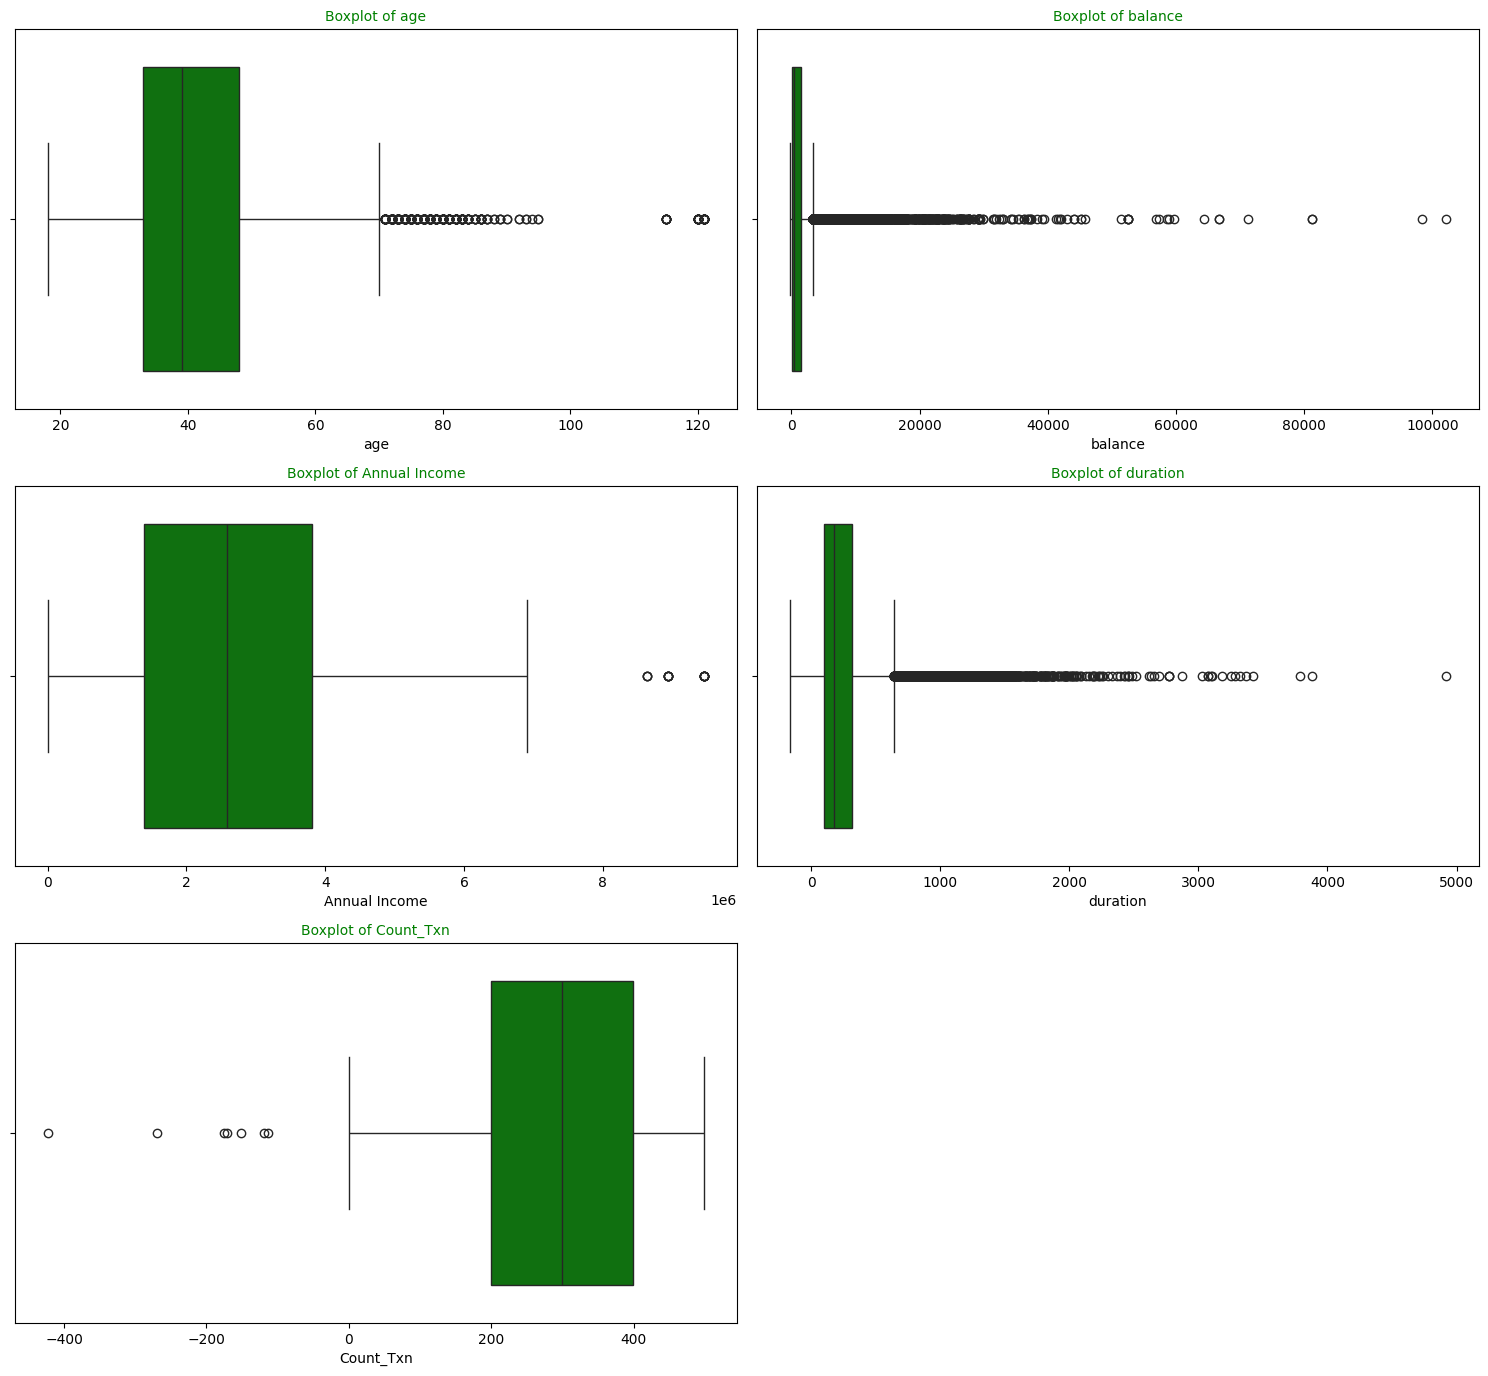

In [ ]:
df_num = final_data[['age', 'balance', 'Annual Income', 'duration', 'Count_Txn']]
col = ['age', 'balance', 'Annual Income', 'duration', 'Count_Txn']

plt.figure(figsize=(15,18))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(4,2,i+1)
    sns.boxplot(x=v,data=df_num,color='green')
    plt.title("Boxplot of {}".format(v),size=10,color="green")
    plt.xlabel("{}".format(v),size=10)
plt.tight_layout()
plt.show()

In [ ]:
#age
final_data.drop(final_data[final_data['age'] > 100].index, inplace=True)

#balance
final_data.drop(final_data[(final_data['balance'] < 0) | (final_data['balance'] > 40000)].index, inplace=True)

#Annual Income
final_data.drop(final_data[final_data['Annual Income'] > 8000000].index, inplace=True)

#Duration
final_data.drop(final_data[final_data['duration'] > 2000].index, inplace=True)

#Count_Txn
final_data.drop(final_data[final_data['Count_Txn'] < 0].index, inplace=True)

# Encoding the categorical variables

In [ ]:
label_encoder = LabelEncoder()

final_data['job'] = label_encoder.fit_transform(final_data['job'])
final_data['marital'] = label_encoder.fit_transform(final_data['marital'])
final_data['education'] = label_encoder.fit_transform(final_data['education'])
final_data['Gender'] = label_encoder.fit_transform(final_data['Gender'])
final_data['Insurance'] = label_encoder.fit_transform(final_data['Insurance'])
final_data['loan'] = label_encoder.fit_transform(final_data['loan'])
final_data['housing'] = label_encoder.fit_transform(final_data['housing'])
final_data['contact'] = label_encoder.fit_transform(final_data['contact'])
final_data['poutcome'] = label_encoder.fit_transform(final_data['poutcome'])
final_data['Term Deposit'] = label_encoder.fit_transform(final_data['Term Deposit'])

In [ ]:
final_data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
Annual Income,0
Gender,0
Insurance,0
balance,0
housing,0
loan,0


# Cleaned Dataset

In [ ]:
final_data.head()

,age,job,marital,education,Annual Income,Gender,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,58,4,1,2,839368,1,0,2143.0,1,0,2,261.0,1,2,0,4,0,351.0
1,44,9,2,1,1452858,1,0,29.0,1,0,3,151.0,1,2,0,4,0,326.0
2,33,2,1,1,4851383,0,0,2.0,1,1,3,76.0,1,2,0,4,0,422.0
3,47,1,1,3,3207754,0,0,1506.0,1,0,3,92.0,1,2,0,4,0,113.0
4,33,11,2,3,2562322,1,0,1.0,0,0,3,198.0,1,2,0,4,0,342.0


## Visualizations

<ipython-input-61-843dd64445b7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Term Deposit', data=final_data, palette=pastel_palette)
<ipython-input-61-843dd64445b7>:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='Term Deposit', data=final_data, palette=pastel_palette)


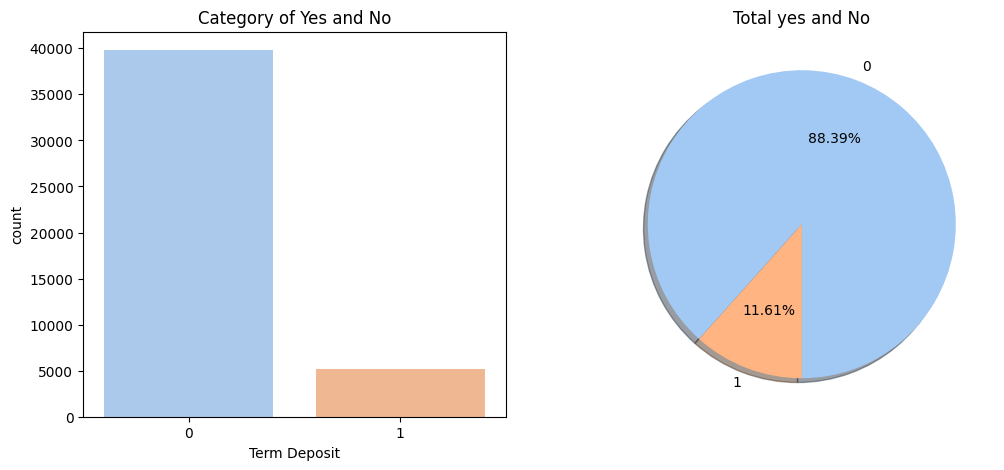

In [ ]:
#Visulaizing the target variable

pastel_palette = sns.color_palette("pastel")

# Visulaizing the target variable
plt.figure(figsize=(12, 5))

# Countplot with pastel colors
plt.subplot(1, 2, 1)
sns.countplot(x='Term Deposit', data=final_data, palette=pastel_palette)
plt.title("Category of Yes and No")

# Pie chart with pastel colors
plt.subplot(1, 2, 2)
labels = final_data['Term Deposit'].value_counts(sort=True).index
sizes = final_data['Term Deposit'].value_counts(sort=True)
plt.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=270, colors=pastel_palette)
plt.title('Total yes and No', size=12)

plt.show()

# 1. Term Deposit and Related Variables

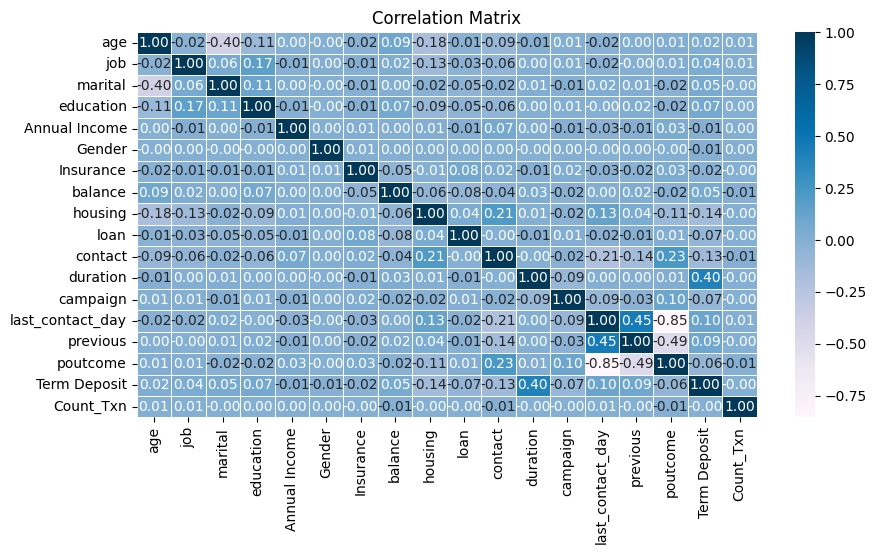

In [ ]:
# Calculate the correlation matrix
correlation_matrix = final_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## 2. Predictive Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
X = final_data.drop('Term Deposit',axis=1)
y = final_data['Term Deposit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

##Importing all the required ML packages

In [ ]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report

# Logistic Regression

In [ ]:
lr= LogisticRegression()

lr.fit(X_train_s,y_train)
Y_pred_lr = lr.predict(X_test_s)

print("Testing Accuracy of LogisticRegression : ",metrics.accuracy_score(y_test,Y_pred_lr))

print("Training Accuracy of LogisticRegression : ",lr.score(X_train_s,y_train))

Testing Accuracy of LogisticRegression :  0.8881118881118881
Training Accuracy of LogisticRegression :  0.8925122113676732


# Support Vector Machine

In [ ]:
svm=svm.SVC(kernel='linear')

svm.fit(X_train_s,y_train)
Y_pred_svm = svm.predict(X_test_s)

print("Testing Accuracy of SVM : ",metrics.accuracy_score(y_test,Y_pred_svm))

print("Training Accuracy of SVM : ",svm.score(X_train_s,y_train))

Testing Accuracy of SVM :  0.8787878787878788
Training Accuracy of SVM :  0.8851853907637656


# Decision Tree

In [ ]:
dt= DecisionTreeClassifier()

dt.fit(X_train_s,y_train)
Y_pred_dt = dt.predict(X_test_s)

print("Testing Accuracy of Decision Tree : ",metrics.accuracy_score(y_test,Y_pred_dt))

print("Training Accuracy of Decision Tree : ",dt.score(X_train_s,y_train))

Testing Accuracy of Decision Tree :  0.8527028527028527
Training Accuracy of Decision Tree :  1.0


# KNN

In [ ]:
knn= KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train_s,y_train)
Y_pred_knn = knn.predict(X_test_s)

print("Testing Accuracy of KNN : ",metrics.accuracy_score(y_test,Y_pred_knn))

print("Training Accuracy of KNN : ",knn.score(X_train_s,y_train))

Testing Accuracy of KNN :  0.8865578865578866
Training Accuracy of KNN :  0.9114398312611013


# Gaussian Naive Bayes

In [ ]:
nb= GaussianNB()

nb.fit(X_train_s,y_train)
Y_pred_nb = nb.predict(X_test_s)

print("Testing Accuracy of Naive Bayes : ",metrics.accuracy_score(y_test,Y_pred_knn))

print("Training Accuracy of Naive Bayes : ",nb.score(X_train_s,y_train))

Testing Accuracy of Naive Bayes :  0.8865578865578866
Training Accuracy of Naive Bayes :  0.8450266429840142


# Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=200)

rf.fit(X_train_s,y_train)
Y_pred_rf = rf.predict(X_test_s)

print("Testing Accuracy of RF : ",metrics.accuracy_score(y_test,Y_pred_rf))

print("Training Accuracy of RF : ",rf.score(X_train_s,y_train))

Testing Accuracy of RF :  0.8965478965478966
Training Accuracy of RF :  1.0


# XGBoost

In [ ]:
xgb_model = XGBClassifier(n_estimators=200)

xgb_model.fit(X_train_s, y_train)


y_pred_xgb = xgb_model.predict(X_test_s)

print("Testing Accuracy of XGBoost:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Training Accuracy of XGBoost:", xgb_model.score(X_train_s, y_train))

Testing Accuracy of XGBoost: 0.8922188922188922
Training Accuracy of XGBoost: 0.9742728685612788


# 3. Model Improvement Strategies:

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

<ipython-input-76-fbd2afd0eef9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette=pastel_palette)
<ipython-input-76-fbd2afd0eef9>:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=y_resampled, palette=pastel_palette)


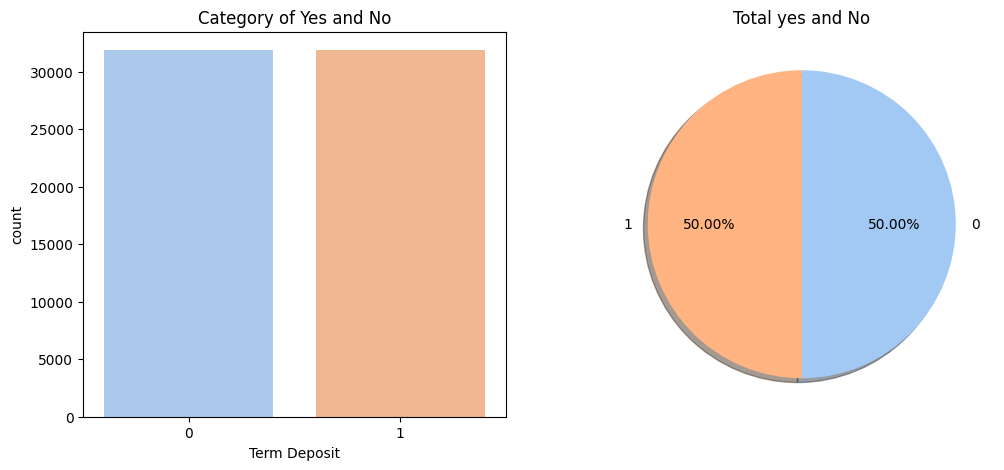

In [ ]:
#Visulaizing the target variable after resampling
pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_resampled, palette=pastel_palette)
plt.title("Category of Yes and No")

plt.subplot(1, 2, 2)
labels = y_resampled.value_counts(sort=True).index
sizes = y_resampled.value_counts(sort=True)
plt.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=270, colors=pastel_palette)
plt.title('Total yes and No', size=12)

plt.show()

In [ ]:
scaler = StandardScaler()

X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Model fitting after balancing the data

In [ ]:
logreg_model = LogisticRegression(random_state=42)

logreg_model.fit(X_resampled_scaled, y_resampled)

y_pred_logreg = logreg_model.predict(X_test_scaled)

print("Testing Accuracy of Logistic Regression:", metrics.accuracy_score(y_test, y_pred_logreg))
print("Training Accuracy of Logistic Regression:", logreg_model.score(X_resampled_scaled, y_resampled))

Testing Accuracy of Logistic Regression: 0.8261738261738262
Training Accuracy of Logistic Regression: 0.8656215707791189


# Regularization

In [ ]:
#L2 regularization
logreg_l2_model = LogisticRegression(penalty='l2', C=2.0, random_state=42)

# Fit the model on the training data
logreg_l2_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = logreg_l2_model.predict(X_train)

# Make predictions on the testing set
y_pred_test = logreg_l2_model.predict(X_test)

# Evaluate the accuracy of the model on the training set
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
print("Training Accuracy with L2 Regularization:", accuracy_train)

# Evaluate the accuracy of the model on the testing set
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Testing Accuracy with L2 Regularization:", accuracy_test)

Training Accuracy with L2 Regularization: 0.8859624777975134
Testing Accuracy with L2 Regularization: 0.8815628815628815


In [ ]:
#L1 Regularization
logreg_l1_model = LogisticRegression(penalty='l1', C=2.0, random_state=42, solver='liblinear')

# Fit the model on the training data
logreg_l1_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_l1 = logreg_l1_model.predict(X_train)

# Make predictions on the testing set
y_pred_test_l1 = logreg_l1_model.predict(X_test)

# Evaluate the accuracy of the model on the training set
accuracy_train_l1 = metrics.accuracy_score(y_train, y_pred_train_l1)
print("Training Accuracy with L1 Regularization:", accuracy_train_l1)

# Evaluate the accuracy of the model on the testing set
accuracy_test_l1 = metrics.accuracy_score(y_test, y_pred_test_l1)
print("Testing Accuracy with L1 Regularization:", accuracy_test_l1)

Training Accuracy with L1 Regularization: 0.8927619893428064
Testing Accuracy with L1 Regularization: 0.8882228882228882


## Hyperparameter tuning for a Support Vector Machine (SVM)

In [ ]:
from sklearn import svm
svm1=svm.SVC()
C=[0.05,0.2,0.4,0.6,0.8,1,2,5]

hyper={'C':C}
model=GridSearchCV(estimator=svm1, param_grid=hyper,cv=10)
model.fit(X_train_s,y_train)
print(model.best_score_)
print(model.best_estimator_)

0.9013101826908949
SVC(C=0.8)


In [ ]:
gd_best=model.best_estimator_
gd_best.fit(X_train_s, y_train)

SVC(C=0.8)

In [ ]:
print("Test Accuracy :",gd_best.score(X_test_s,y_test))
print("Train Accuracy :",gd_best.score(X_train_s,y_train))

Test Accuracy : 0.8922188922188922
Train Accuracy : 0.9079429396092362


## ***The models with the best performance are : XGBoost and Random Forest***

---



# XGBoost

In [ ]:
#Classification Report
print(classification_report(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7917
           1       0.59      0.37      0.46      1092

    accuracy                           0.89      9009
   macro avg       0.75      0.67      0.70      9009
weighted avg       0.88      0.89      0.88      9009

[[7629  288]
 [ 683  409]]


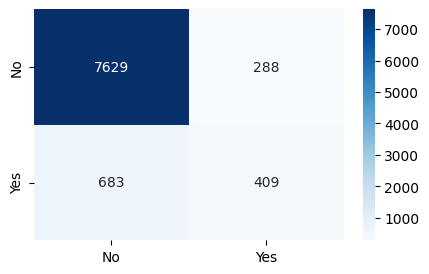

In [ ]:
#Confusion Matrix
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_xgb),annot=True,cmap="Blues",
            fmt="d",cbar=True,xticklabels=['No','Yes'],yticklabels=['No','Yes'],
            annot_kws={"fontsize":10})
plt.show()

<ipython-input-86-2117f16cb610>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:15], y=feature_importances.index[:15], palette="rocket")


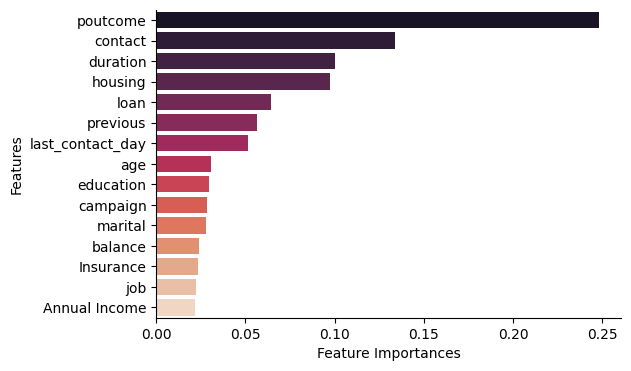

In [ ]:
# Feature Importance by XG Boost
plt.figure(figsize=(6,4))
importances= xgb_model.feature_importances_
feature_importances= pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[:15], y=feature_importances.index[:15], palette="rocket")
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

# Random Forest

In [ ]:
#Classification Report
print(classification_report(y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7917
           1       0.64      0.34      0.44      1092

    accuracy                           0.90      9009
   macro avg       0.78      0.65      0.69      9009
weighted avg       0.88      0.90      0.88      9009



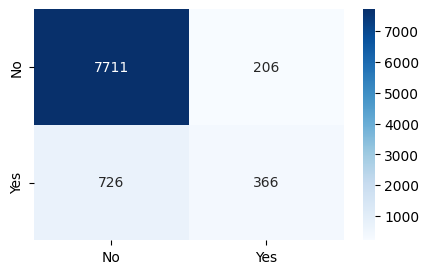

In [ ]:
#Confusion Matrix
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,Y_pred_rf),annot=True,cmap="Blues",
            fmt="d",cbar=True,xticklabels=['No','Yes'],yticklabels=['No','Yes'],
            annot_kws={"fontsize":10})
plt.show()

<ipython-input-89-c14233a36b00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10], palette="rocket")


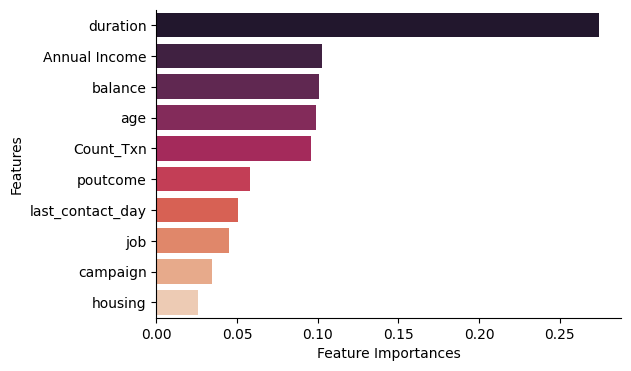

In [ ]:
# Feature Importance by Random Forest
plt.figure(figsize=(6,4))
importances= rf.feature_importances_
feature_importances= pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10], palette="rocket")
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

## ***Voting Classifier ensemble using XGBoost and Random Forest***

---



In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb_model)], voting='hard')

ensemble_model.fit(X_train_s, y_train)

# Make predictions on the training set
y_pred_train = ensemble_model.predict(X_train_s)

# Make predictions on the testing set
y_pred_test = ensemble_model.predict(X_test_s)

# Calculate and print the accuracy of the ensemble model on the training set
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
print("Training Accuracy of the Ensemble Model:", accuracy_train)

# Calculate and print the accuracy of the ensemble model on the testing set
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Testing Accuracy of the Ensemble Model:", accuracy_test)

Training Accuracy of the Ensemble Model: 0.9764653641207816
Testing Accuracy of the Ensemble Model: 0.8956598956598957
